In [1]:
import spacy
import pandas as pd

import tqdm
from spacy import displacy
from matplotlib import pyplot as plt

In [5]:
# !python -m spacy download pt_core_news_lg

In [6]:
# nlp_model = spacy.load("en_core_web_trf")
nlp_model = spacy.load("pt_core_news_lg")

|Type | 	Description |
|------|--------------|
| PERSON | 	People, including fictional like **Harry Potter** |
| NORP | 	Nationalities or religious or political groups like the **Germans** |
| FAC | 	Buildings, airports, highways, bridges, etc. like **New York Airport** |
| ORG | 	Companies, agencies, institutions, etc. like **Microsoft** |
| GPE | 	Countries, cities, states. like **Germany** |
| LOC | 	Non-GPE locations, mountain ranges, bodies of water. Like the **Sahara desert**|
| PRODUCT | 	Objects, vehicles, foods, etc. (Not services.) like **playstation** |
| EVENT | 	Named hurricanes, battles, wars, sports events, etc. like **hurricane Katrina**|
| WORK_OF_ART | 	Titles of books, songs, etc. Like **Mona Lisa** |
| LAW | 	Named documents made into laws. Like : **Declaration of Independence** |
| LANGUAGE | 	Any named language. Like **Turkish**|
| DATE | 	Absolute or relative dates or periods. Like every second **friday**|
| TIME | 	Times smaller than a day. Like **every minute**|
| PERCENT | 	Percentage, including ”%“. Like **55%** of workers enjoy their work |
| MONEY | 	Monetary values, including unit. Like **50$** for those pants |
| QUANTITY | 	Measurements, as of weight or distance. Like this person weights **50kg** |
| ORDINAL | 	“first”, “second”, etc. Like David placed **first** in the tournament |
| CARDINAL | 	Numerals that do not fall under another type. Like **hundreds** of models are avaiable in NLU |

In [7]:
def simple_clean_text(text):
    return " ".join(text.replace('\n', '').split())

def chunk_class(tag):
    
    """
        Converte as classes Spacy em um modelo customizado...
    """
    
    final = tag
    
    try:
        pre, suf = tag.split('-')
    except:
        return final
    
    if suf == 'PERSON': 
        final = pre + '-PER'
        
        
    if suf == 'GPE' or suf == 'FAC': 
        final = pre + '-LOC'
        
    return final


def parser(index, sentence, apply_func):
    
    document = apply_func(simple_clean_text(sentence))

    orgin_tokens = []
    origin_tags = []
    
    for word_obj in document:
        
        tmp_tag = 'O'
        if word_obj.ent_iob_ != 'O':
            tmp_tag = word_obj.ent_iob_+ '-' + word_obj.ent_type_

        orgin_tokens.append(str(word_obj))
        origin_tags.append(chunk_class(tmp_tag))

    return pd.DataFrame({
        "Sentence": ['Sentence #' + str(index)] * len(orgin_tokens),
        "Word": orgin_tokens,
        "Tag": origin_tags
    })

In [9]:
data = pd.read_csv("VACINAS_PT_BR.csv", lineterminator='\n')

In [10]:
%%time

final_data_annotate = pd.DataFrame()

for index, text in enumerate(tqdm.notebook.tqdm(data.text)):
    
    tmp_pd = parser(index, text, nlp_model)
    
    if len(tmp_pd.Tag.value_counts()) <= 1:
        pass
    else:
        final_data_annotate = final_data_annotate.append(tmp_pd)


CPU times: user 31min 21s, sys: 3.89 s, total: 31min 25s
Wall time: 31min 18s


In [24]:
final_data_annotate.head(60)

,Sentence,Word,Tag
0,Sentence #0,A,O
1,Sentence #0,terceira,O
2,Sentence #0,dose,O
3,Sentence #0,da,O
4,Sentence #0,vacina,O
5,Sentence #0,do,O
6,Sentence #0,Corona,B-LOC
7,Sentence #0,não,O
8,Sentence #0,é,O
9,Sentence #0,igual,O


O         777544
B-LOC      25789
B-PER      19688
B-MISC     17178
I-MISC     16497
B-ORG      10678
I-LOC       8412
I-PER       5616
I-ORG       4682
Name: Tag, dtype: int64


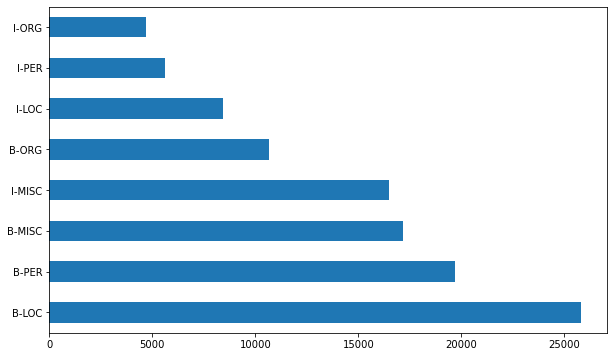

In [12]:
print(final_data_annotate.Tag.value_counts())

print("=" * 80)

plt.figure(figsize = (10, 6))
final_data_annotate[final_data_annotate.Tag != 'O']\
    .Tag\
    .value_counts()\
    .plot\
    .barh();

In [13]:
final_data_annotate.to_csv('data/custom/DATA_TWEETS_VACINAS_PT_BR.csv', index=None)